 # $Telco$ $Churn$ $Final$ $Project$

# **Goals:**

* Discover the drivers of customer churn within the Telco company.

* Use drivers to built a model that can predict if a Telco customer will churn.

## Imports

In [111]:
import pandas as pd
import numpy as np
import matplotlib
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle as w
import explore as e
import model as m
randomseed = 123

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

# Acquire:

* Data acquire from Codeup Database 10/27/22

* It contained  7043 rows and 24 columns before cleaning

* Each row represents a Telco customers

* Each column represents a feature related to the customer.

In [2]:
# acquire telco data 
df = w.get_telco_data()

# Prepare:

prepare actions:

* Removed columns that contain unuseful information.
* Removed columns that contain redundant information.
* Removed 11 observations with whitespace in total charges column.
* Checked columns were the appropriate data type.
    * Total charges was converted to appropriate numeric data type.
* Null values where not found
* Outliers have not been removed
* Encoded categorical variables
* Split data into train, validate and test 
    * Approximately: train 56%, validate 24%, test 20%
    * Stratified on 'churn'



###                                                        <h1><center>Data Dictionary</center></h1>     
| Feature | Definition |
| :- | :- |
| Gender | Whether a customer is male or female |
| Senior Citizen | Whether a customer is Senior Citizen (1) or not (0) |
| Partner | Whether the customer has a partner or not |
| Dependents | Whether the customer has dependents or not |
| Tenure | Number of months the customer has stayed with the company |
| PhoneService | Whether the customer has a phone service or not |
| MultipleLines | Whether the customer has multiple lines or not (Yes, No, No phone service)|
| InternetService | Customer’s internet service provider (DSL, Fiber optic, No internet srvice)|
| OnlineSecurity | Whether the customer has online security or not (Yes, No, No internet service) |
| Additional Features | Encoded and values for categorical data and scaled versions continuous data|

In [3]:
# cleaning data
df = w.prep_telco(df)

# split data: train, validate and test
train, validate, test = w.split_telco_data(df)

# Looking at the data

In [4]:
train.head(10)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,71.10,4299.20,No,One year,DSL,Credit card (automatic),1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,No,No,No,Yes,85.45,6028.95,No,One year,Fiber optic,Credit card (automatic),0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,25.75,882.55,No,Month-to-month,None,Electronic check,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.20,19.20,No,Month-to-month,None,Mailed check,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1
6279,Male,1,No,No,20,Yes,No,Yes,No,No,Yes,No,No,No,54.00,1055.90,No,One year,DSL,Mailed check,0,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1
6992,Female,0,No,No,14,Yes,Yes,No,No,Yes,No,No,No,Yes,80.45,1072.00,Yes,Month-to-month,Fiber optic,Electronic check,1,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
3614,Female,0,Yes,No,43,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,86.45,3574.50,No,Two year,DSL,Credit card (automatic),1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0
4352,Female,0,No,No,7,Yes,Yes,Yes,No,No,No,No,No,Yes,53.65,404.35,No,Month-to-month,DSL,Electronic check,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0
6845,Male,0,Yes,Yes,29,Yes,No,No,No,No,No,No,No,Yes,70.75,1974.80,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
3782,Female,0,Yes,Yes,58,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,75.80,4415.75,No,Two year,DSL,Mailed check,1,0,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1


# Data Summary

In [5]:
train.describe()

,senior_citizen,tenure,monthly_charges,total_charges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,0.161290,32.775210,64.805131,2316.775641,0.498095,0.501905,0.514859,0.485141,0.697231,0.302769,0.094742,0.905258,0.481331,0.094742,0.423927,0.487173,0.220218,0.292609,0.431039,0.220218,0.348743,0.430023,0.220218,0.349759,0.490475,0.220218,0.289307,0.393447,0.220218,0.386335,0.388367,0.220218,0.391415,0.409703,0.590297,0.549911,0.207010,0.243078,0.342393,0.437389,0.220218,0.218948,0.227330,0.327407,0.226314
std,0.367845,24.709604,30.294804,2284.984394,0.500060,0.500060,0.499843,0.499843,0.459514,0.459514,0.292896,0.292896,0.499715,0.292896,0.494242,0.499899,0.414447,0.455018,0.495284,0.414447,0.476633,0.495142,0.414447,0.476954,0.499973,0.414447,0.453498,0.488577,0.414447,0.486971,0.487441,0.414447,0.488129,0.491841,0.491841,0.497566,0.405215,0.428997,0.474570,0.496127,0.414447,0.413586,0.419161,0.469327,0.418498
min,0.000000,1.000000,18.250000,18.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,34.700000,396.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,30.000000,70.250000,1414.800000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,56.000000,90.300000,3893.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0

# Explore:

## How often does churn occur?

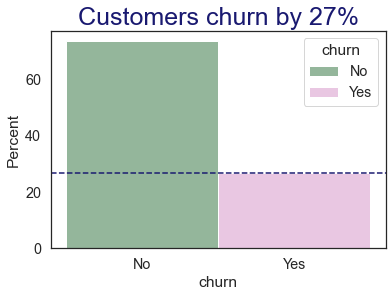

In [6]:
e.get_churn_mean_bar(train)

 * **It appears that about 27% of Telco customers churn.**

## Do customer who churn have higher monthly charges?

AttributeError: module 'seaborn' has no attribute 'set_axis_labels'

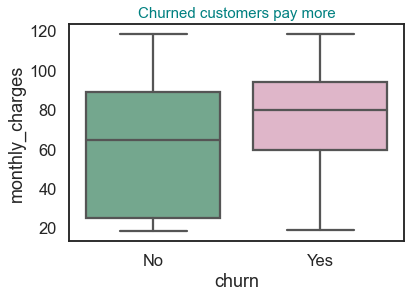

In [88]:
def get_monthly_charges(df):
    ''' This function takes in telco data frame and returns a boxplot that
        shows the difference in total charges means.
    '''
    # create boxplot and set parameters
    g=sns.boxplot(y=df.monthly_charges, x=df.churn,
                whis=np.inf
               )
    # set backgorund and text scale
    sns.set(font_scale=1.3)  
    
    sns.set_theme('talk')
    sns.set_style('white')

    # Set your custom color palette
    colors = ['#6BAF8E', '#E6AFC9']
    sns.set_palette(sns.color_palette(colors))

    # create title 
    plt.title('Churned customers pay more',fontsize=15,fontweight=100,color='teal')
    sns.set_axis_labels('blue')
    sns.set_axis_labels("Loyal", "churn")
 
    plt.show(g)
    
# Obtain boxplot displaying mean of monthly charges
get_monthly_charges(train)

In [135]:
fig, ax = plt.subplots()

sns.boxplot(y=df.monthly_charges, x=df.churn,
                whis=np.inf, palette='pastel'
               ,dodge=False, ax=)

#sns.set(xlabel='FICO Score',ylabel='Interest Rate')
    # create title 
plt.title('Churned customers pay more',fontsize=25,color='Black')
ax.set_ylabels("")

SyntaxError: invalid syntax (431392878.py, line 5)

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylabels'

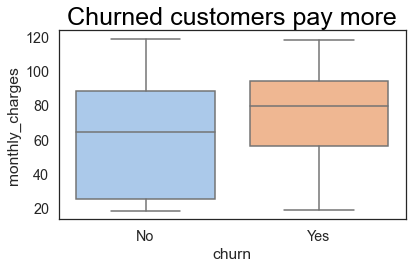

In [129]:
plt.rcParams["figure.figsize"] = [6, 4]
plt.rcParams["figure.autolayout"] = True

 # create boxplot and set parameters
sns.boxplot(y=df.monthly_charges, x=df.churn,
                whis=np.inf, palette='pastel'
               ,dodge=False)
# set backgorund and text scale
sns.set(font_scale=1.3)  


sns.set_style('white')
# sns.set_theme(font='Ariel')

#sns.set(xlabel='FICO Score',ylabel='Interest Rate')
    # create title 
plt.title('Churned customers pay more',fontsize=25,color='Black')
plt.set_ylabels("")

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticklabel'

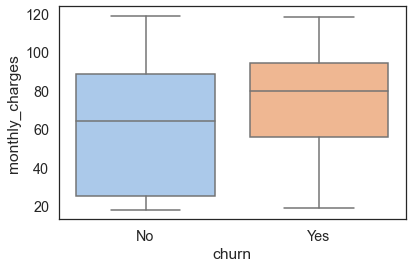

In [141]:
sns.boxplot(y=df.monthly_charges, x=df.churn, palette='pastel')

plt.set_xticklabel('')

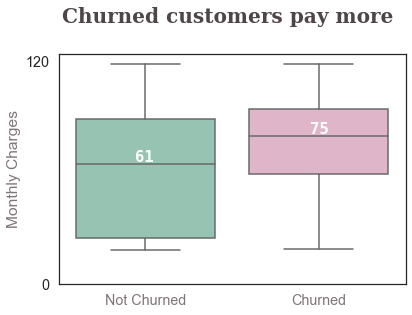

In [290]:
fig, ax1 = plt.subplots(1,1, figsize=(6,4.5))

#Set your custom color palette
colors = ['#8FCBB4', '#E6AFC9']
sns.set_palette(sns.color_palette(colors))

plt.suptitle('      Churned customers pay more',horizontalalignment='center',color ='#4F4549', fontsize=20,fontweight ='extra bold',fontfamily = 'serif')
sns.boxplot(y="monthly_charges", x="churn", ax=ax1, data=train, )
ax1.set_ylabel(ylabel='Monthly Charges',color ='#80757A')
ax1.set_yticks(ticks=[0,120])
ax1.set_xlabel(xlabel='')
ax1.set_xticklabels(['Not Churned','Churned'],color ='#80757A')
ax1.text(-.060,66, '61',color='white',fontweight ='bold',fontfamily = 'monospace')
ax1.text(.95,81, '75', color = 'white',fontweight ='bold',fontfamily = 'monospace')
plt.show()



In [33]:
churn_pop = train[train.churn=='Yes']

In [307]:
churn_pop.shape,current.shape

((1046, 61), (2891, 61))

In [308]:
train.shape

(3937, 61)

In [35]:
current = train[train.churn=='No']

In [52]:
round(churn_pop.monthly_charges.mean())

75

In [201]:
round(current.monthly_charges.mean())

61

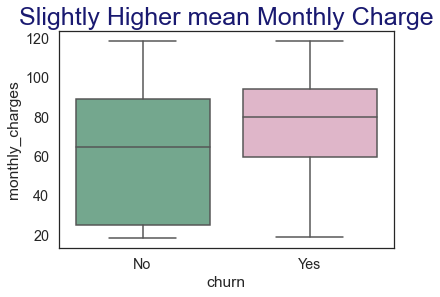

In [8]:
# Obtain boxplot displaying mean of monthly charges
get_monthly_charges(train)

* **The mean monthly charges of customers who churn is slightly higher than the mean monthly charges of customers who do not churn.** 

**I will now conduct a T-test to test for a significant difference between the mean of monthly charges of customers who churn and the mean oc monthly charges of customers who do not churn.**

* The confidence interval is 95%
* Alpha is set to 0.05 
* p/2 will be compared to alpha

$H_0$: Mean tenure of Telco customers who churn == mean tenure of Telco customers who do not churn.

$H_a$: Tean tenure of Telco customers who churn != mean tenure of Telco customers who do not churn.

In [9]:
# Stats T-Test result
e.get_ttest_monthly_charges(train)

 t-stat:  14.0896
 p-value/2:  0.0


The p-value/2 is less than the alpha. **There is  evidence to support that customers who churn on average pay higher monthly charges than customers who do not churn.** Based on this statistical finding I believe that monthly charges is a driver of customer churn.Adding an encoded version of this feature to the model will likely increase the model's accuracy.


## Is the mean tenure of customers who churn lower?

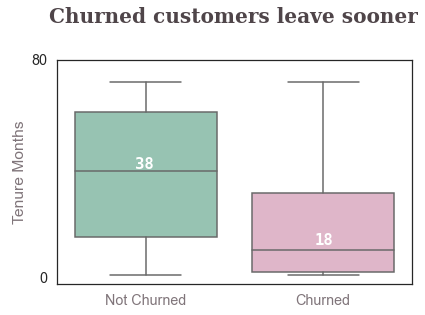

In [312]:
fig, ax1 = plt.subplots(1,1, figsize=(6,4.5))

#Set your custom color palette
colors = ['#8FCBB4', '#E6AFC9']
sns.set_palette(sns.color_palette(colors))

plt.suptitle('      Churned customers leave sooner',horizontalalignment='center',color ='#4F4549', fontsize=20,fontweight ='extra bold',fontfamily = 'serif')
sns.boxplot(y="tenure", x="churn", ax=ax1, data=train, )
ax1.set_ylabel(ylabel='Tenure Months',color ='#80757A')
ax1.set_yticks(ticks=[0,80])
ax1.set_xlabel(xlabel='')
ax1.set_xticklabels(['Not Churned','Churned'],color ='#80757A')
ax1.text(-.060,40, '38',color='white',fontweight ='bold',fontfamily = 'monospace')
ax1.text(.95,12, '18', color = 'white',fontweight ='bold',fontfamily = 'monospace')
plt.show()



In [303]:
churn_pop.tenure.mean()


18.325047801147228

In [300]:
current.tenure.mean()

38.003459010722935

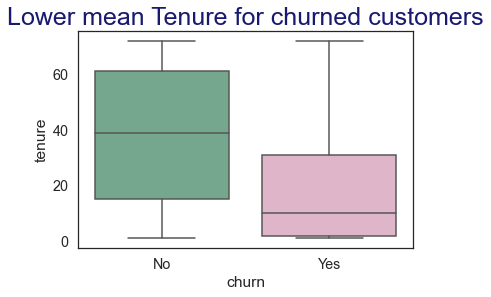

In [10]:
# Obtain boxplot on tenure vs churn
e.get_boxplot_tenure(train)

* **We can see that the tenure mean of customers who churn  is less than the tenure mean of customers who do not churn.**

**I will now conduct a T-test to determine if there on average customers who churn have a lower tenure than customers who do not churn.**

* The confidence interval is 95%
* Alpha is set to 0.05 
* p/2 will be compared to alpha

$H_0$: Mean tenure of Telco customers who churn >= mean tenure of Telco customers who do not churn.

$H_a$: Tean tenure of Telco customers who churn < mean tenure of Telco customers who do not churn.

In [11]:
# obtain T-test for tenure vs churn
e.get_ttest_tenure(train)

 t-stat:  -25.77
 p-value/2:  0.0


The p-value/2 is less than alpha. **Therefore we have evidence to support that customors who churn have a tenure average that is lower than customers who do not churn.** Based on this statistical finding I believe that tenure is a driver of customer churn.Adding an encoded version of this feature to the model will likely increase the model's accuracy.**

## Does having Senior Citizen status affect churn?

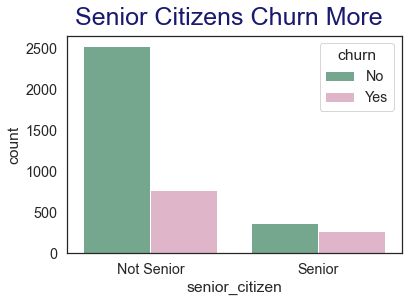

In [12]:
# Obtain bar graph for senior Citizen count
e.get_bar_senior(train)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


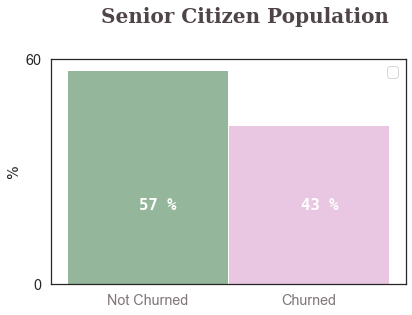

In [456]:
fig, ax1 = plt.subplots(1,1, figsize=(6,4.5))

#Set your custom color palette
colors = ['#8FCBB4', '#E6AFC9']
sns.set_palette(sns.color_palette(colors))

plt.suptitle('           Senior Citizen Population',horizontalalignment='center',color ='#4F4549', fontsize=20,fontweight ='extra bold',fontfamily = 'serif')
sns.histplot( x="churn", hue='churn',ax=ax1, data=population,stat='percent',palette='cubehelix')

ax1.legend()
#ax1.set_xlabel(xlabel='Total Customers',color ='#80757A')
ax1.set_yticks(ticks=[0,60])
ax1.set_xlabel(xlabel='')
ax1.set_ylabel(ylabel='%')
ax1.set_xticklabels(['Not Churned', 'Churned'],color ='#80757A')
ax1.text(.95,20, '43 %',color='white',fontweight ='bold',fontfamily = 'monospace')
ax1.text(-.05,20, '57 %', color = 'white',fontweight ='bold',fontfamily = 'monospace')


plt.show()

In [426]:
population.describe(include ='all')

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phone_service_No,phone_service_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,online_security_No,online_security_No internet service,online_security_Yes,online_backup_No,online_backup_No internet service,online_backup_Yes,device_protection_No,device_protection_No internet service,device_protection_Yes,tech_support_No,tech_support_No internet service,tech_support_Yes,streaming_tv_No,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_No,paperless_billing_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,635,635.0,635,635,635.000000,635,635,635,635,635,635,635,635,635,635.000000,635.000000,635,635,635,635,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
unique,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,2,NaN,NaN,2,3,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Female,NaN,Yes,No,NaN,Yes,Yes,No,No,No,No,Yes,Yes,Yes,NaN,NaN,No,Month-to-month,Fiber optic,Electronic check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,326,NaN,321,580,NaN,580,371,450,339,342,463,320,341,496,NaN,NaN,364,444,458,324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.0,NaN,NaN,33.470866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.295591,2873.479685,NaN,NaN,NaN,NaN,0.513386,0.486614,0.494488,0.505512,0.913386,0.086614,0.086614,0.913386,0.329134,0.086614,0.584252,0.708661,0.039370,0.251969,0.533858,0.039370,0.426772,0.538583,0.039370,0.422047,0.729134,0.039370,0.231496,0.456693,0.039370,0.503937,0.423622,0.039370,0.537008,0.218898,0.781102,0.699213,0.179528,0.121260,0.239370,0.721260,0.039370,0.207874,0.207874,0.510236,0.074016
std,NaN,0.0,NaN,NaN,24.362736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.316690,2406.294046,NaN,NaN,NaN,NaN,0.500215,0.500215,0.500364,0.500364,0.281491,0.281491,0.281491,0.281491,0.470269,0.281491,0.493239,0.454737,0.194627,0.434486,0.499246,0.194627,0.494998,0.498902,0.194627,0.494275,0.444757,0.194627,0.422121,0.498514,0.194627,0.500379,0.494522,0.194627,0.499022,0.413825,0.413825,0.458962,0.384096,0.326686,0.427035,0.448733,0.194627,0.406106,0.406106,0.500289,0.262003
min,NaN,1.0,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.300000,19.450000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.0,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,Na

In [379]:
churn_pop.senior_citizen.value_counts()

0    775
1    271
Name: senior_citizen, dtype: int64

In [380]:
current.senior_citizen.value_counts()

0    2527
1     364
Name: senior_citizen, dtype: int64

In [402]:
population = train[train.senior_citizen ==1]

In [403]:
population.value_counts()

gender  senior_citizen  partner  dependents  tenure  phone_service  multiple_lines    online_security      online_backup        device_protection    tech_support         streaming_tv         streaming_movies     paperless_billing  monthly_charges  total_charges  churn  contract_type   internet_service_type  payment_type               gender_Female  gender_Male  partner_No  partner_Yes  dependents_No  dependents_Yes  phone_service_No  phone_service_Yes  multiple_lines_No  multiple_lines_No phone service  multiple_lines_Yes  online_security_No  online_security_No internet service  online_security_Yes  online_backup_No  online_backup_No internet service  online_backup_Yes  device_protection_No  device_protection_No internet service  device_protection_Yes  tech_support_No  tech_support_No internet service  tech_support_Yes  streaming_tv_No  streaming_tv_No internet service  streaming_tv_Yes  streaming_movies_No  streaming_movies_No internet service  streaming_movies_Yes  paperless_billing_

* **We can see that the population count of churned senior citizens is closer to the total population of senior citizens.**

**I will now conduct a chi-square test to determine if there is an association between senior citizen status and churn.**

* The confidence interval is 95%
* Alpha is set to 0.05 

$H_0$: There is **no** relationship between a customers with senior status and churn.

$H_a$: There is a relationship between a customers senior status and churn.

In [13]:
# Obtain chi-square test
e.get_chi2_senior(train)

 Chi-Square99.7192
 p-value:0.0


The p-value is less thant the alpha. **Therefore there is evidence to support that a customer senior citizen status has an association with churn.** I believe that senior citizen status is a driver of churn. Adding an encoded version of this feature to the model will likely increase the mode's accuracy. 

## Does contract type affect churn?

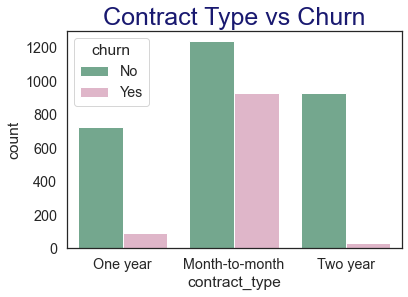

In [14]:
# Obtain plot for contract type vs churn
e.get_plot_contract(train)

In [321]:
train['contract_type'] = pd.Categorical(train['contract_type'], ['Month-to-month','One year', 'Two year'])

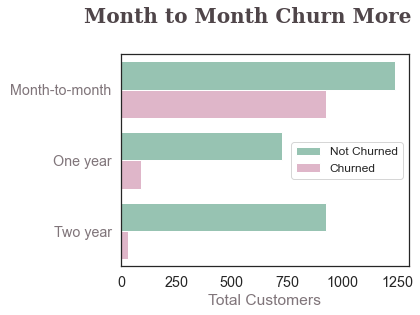

In [376]:
fig, ax1 = plt.subplots(1,1, figsize=(6,4.5))

#Set your custom color palette
colors = ['#8FCBB4', '#E6AFC9']
sns.set_palette(sns.color_palette(colors))

plt.suptitle('           Month to Month Churn More',horizontalalignment='center',color ='#4F4549', fontsize=20,fontweight ='extra bold',fontfamily = 'serif')
sns.countplot( y="contract_type", ax=ax1, data=train, hue='churn')
ax1.legend(['Not Churned','Churned'],loc='center right',prop={'size': 12})
ax1.set_xlabel(xlabel='Total Customers',color ='#80757A')
#ax1.set_yticks(ticks=[0,80])
ax1.set_ylabel(ylabel='')
ax1.set_yticklabels(['Month-to-month','One year', 'Two year'],color ='#80757A')
#ax1.text(1,.3, '927',color='white',fontweight ='bold',fontfamily = 'monospace')
#ax1.text(.95,12, '18', color = 'white',fontweight ='bold',fontfamily = 'monospace')
# Create horizontal bars

plt.show()

In [358]:
churn_pop.contract_type.value_counts()

Month-to-month    927
One year           89
Two year           30
Name: contract_type, dtype: int64

In [368]:
current.contract_type.value_counts()

Month-to-month    1238
Two year           927
One year           726
Name: contract_type, dtype: int64

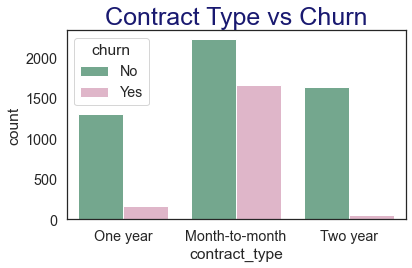

In [313]:

# set font scale and backgound color   
sns.set(font_scale=1.3)  
sns.set_style('white')

# Set your custom color palette
colors = ['#6BAF8E', '#E6AFC9']
sns.set_palette(sns.color_palette(colors))

 # title
plt.title('Contract Type vs Churn',fontsize=25,fontweight=100,color='midnightblue')

# plot countplot
sns.countplot(x=df.contract_type, data=df, hue = 'churn')
plt.show();


* **It seems that customers with a two-year contracts churn less than customers with month-to-month contract.**

**I will now conduct a chi-square test to determine if there is an association between contract type and churn.**

* The confidence interval is 95%
* Alpha is set to 0.05 

$H_0$: There is **no** relationship between contract type and churn.

$H_a$: There is a relationship between contract type and churn.

In [15]:
# Obtain chi-square on Contract type
e.get_chi2_contract(train)

 Chi-Square:664.6572
 p-value:0.0


The p-value is less than alpha. **There is evidence to support that tenure has an association with churn.** I believe that tenure is a driver of churn. Adding an encoded version of this feature to the model will likely increase the mode's accuracy.

# Exploration Summary

* Monthly Charges is a driver of churn
* Senior Citizen status is a driver of churn
* Tenure is a driver of churn
* Contract type is a driver of churn
* Partner is a driver of churn
* Gender is not a driver of churn

# Features that will be included in my model

* **Monthly charges**  has a significant statistical relationship to churn
* **Senior Citizen**  has a significant statistical relationship to churn
* **Tenure**  has a significant statistical relationship to churn
* **Contract type** has a significan statistical relationship to churn
* **Partner**  has a significant statistical relationship to churn

# Features that will be not included in my model

* **Gender** did not have a statistical significant relationship to churn.
* **Other features** have unknow significance to churn at the moment
    * Given more time I would determined if these other features would result in any model gains

# Modeling:

* Accuracy is the metric use in the models.
    * Accuracy helps gauge the percentage of correct predictions
* Churn customers makeup 27% of the data 
* Since non-churned customers make up 73% of the data 
    * 73% will be the baseline
* I will evaluate my top model of Decision Tree, KNN, and Logistic Regression on train and validate data
* The model that performs the best will then be evaluated on test data

In [16]:
# prep data for modeling
x_train,y_train,x_validate,y_validate, x_test, y_test = m.model_prep(train,validate,test)

## Decision Tree

In [17]:
# Get Decision Tree results
m.get_tree_model(x_train,y_train,x_validate,y_validate)

Accuracy of Decision Tree on train data is 0.7899415798831597 about 79%
Accuracy of Decision Tree on validate data is 0.7766587677725119about 78%
Difference between train and validate accuracy: 0.0133


**The accuracy of the Decision Tree model is above the baseline in both train and validate.** 

## KNN

In [18]:
# Get KNN model results
m.get_knn_model(x_train,y_train,x_validate,y_validate)

Accuracy of KNN on train data is 0.8016256032512065 about 80%
Accuracy of KNN on validate data is 0.7802132701421801 about 78%
Difference between train and validate accuracy: 0.0214


**The accuracy of the KNN is above the baseline in both train and validate.** 

## Logistic Regression

In [19]:
# Get Logic Regression model results
m.get_logit_model(x_train,y_train,x_validate,y_validate)

Accuracy of Logistic Regression on train data is 0.7896875793751588 about 79%
Accuracy of Logistic Regression on validate data is 0.7784360189573459 about 78%
Difference between train and validate accuracy: 0.0113


**The accuracy of the Logistic Regression model is above the baseline in both train and validate.** 

# Comparing Models

* All Models performed above the baseline in both train and validate data
* Since all models performed well I will select the Model with the least accuracy diffirence between train and validate
* I will select the Logistic Regression as the final model.

# Logistic regression on Test data

In [20]:
m.get_logit_model(x_train,y_train,x_test,y_test, True)

Accuracy of Logistic Regression on train data is 0.7896875793751588 about 79%
Accuracy of Logistic Regression on test data is 0.8052594171997157 about 81%
Difference between validate and test accuracy: -0.0156


## Modeling Summary

* Decision Tree, KNN and Logistic Regression models all performed aboved the baseline

* Logistic Regression Model performed 7% above the baseline in terms of accuracy.

# Conclusion

## Exploration



* About 27% of Telco customers churn.
* Customers who churn tend to:
    * have a higher a monthly charge
    * lower tenure mean
* Contract type, partner status and senior status have an association with churn 
* Gender has no influence on churn 

## Modeling

**The final model performed well above the baseline by 7% in terms of accuracy.**

## Recommendations

* Have appealing incentives for customers to sign a two-year contract.
* Run a promotion to lower monthly charges for new customers.
* Give discounts to senior citizens

## Next Steps

* Explore the statistical significance of other features in regards to churn.
* Use bivariate data to explore if other factors are causing senior citizens to churn.
* Use bivariate data to explore what other services  are utilized by customers with two-year contracts.